# Прописываем все необходимые библиотеки

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Описание набора данных

### Датасет был взят с Kaggle по следующей ссылке - <a href="https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data?select=heart_statlog_cleveland_hungary_final.csv">Heart Disease Dataset</a>

### Этот набор данных о заболеваниях сердца создан путем объединения 5 популярных наборов данных о заболеваниях сердца, которые уже доступны независимо друг от друга, но ранее не объединялись. В этом наборе данных 5 наборов данных о заболеваниях сердца объединены по 11 общим признакам, что делает его самым большим набором данных о заболеваниях сердца, доступным на сегодняшний день для исследовательских целей. Для его создания были использованы следующие пять наборов данных:
  * ### Кливленд
  * ### Венгерский
  * ### Швейцария
  * ### Лонг-Бич, Вирджиния

***
### Набор данных Statlog (Heart).
### Этот набор данных состоит из 1190 экземпляров с 11 функциями. Эти наборы данных были собраны и объединены в одном месте, чтобы помочь в проведении исследований в области машинного обучения и алгоритмов интеллектуального анализа данных, связанных с САПР, и, как мы надеемся, в конечном итоге улучшить клиническую диагностику и раннее лечение.

<img src="describe.jpg" width="1000" align="center">

# Загружаем и предварительно проводим анализ датасета

In [14]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

Посмотрим какой тип данных pandas назначил атрибутам, а также наличие Null

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Имеем датасет из 1190 наблюдений, среди всех атрибутов ни в одном нет Null значения, что хорошо.

В самом начале на картинке представлено описание атрибутов, какие они должны быть, pandas назначил практически всем фичам оин формат - int64. Нам необходимо переназначить формат данных атрибутам *'chest pain type'*, *'resting ecg'* и *'ST slope'* категориальный тип данных

In [23]:
data['chest pain type'] = data['chest pain type'].astype('category')
data['resting ecg'] = data['resting ecg'].astype('category')
data['ST slope'] = data['ST slope'].astype('category')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   int64   
 1   sex                  1190 non-null   int64   
 2   chest pain type      1190 non-null   category
 3   resting bp s         1190 non-null   int64   
 4   cholesterol          1190 non-null   int64   
 5   fasting blood sugar  1190 non-null   int64   
 6   resting ecg          1190 non-null   category
 7   max heart rate       1190 non-null   int64   
 8   exercise angina      1190 non-null   int64   
 9   oldpeak              1190 non-null   float64 
 10  ST slope             1190 non-null   category
 11  target               1190 non-null   int64   
dtypes: category(3), float64(1), int64(8)
memory usage: 87.8 KB


Теперь формат данных всем атрибутам назначен правильно

Далее посмотрим на основную статистику по датасету

In [25]:
data.describe()

age          sex  resting bp s  cholesterol  \
count  1190.000000  1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866    132.153782   210.363866   
std       9.358203     0.424884     18.368823   101.420489   
min      28.000000     0.000000      0.000000     0.000000   
25%      47.000000     1.000000    120.000000   188.000000   
50%      54.000000     1.000000    130.000000   229.000000   
75%      60.000000     1.000000    140.000000   269.750000   
max      77.000000     1.000000    200.000000   603.000000   

       fasting blood sugar  max heart rate  exercise angina      oldpeak  \
count          1190.000000     1190.000000      1190.000000  1190.000000   
mean              0.213445      139.732773         0.387395     0.922773   
std               0.409912       25.517636         0.487360     1.086337   
min               0.000000       60.000000         0.000000    -2.600000   
25%               0.000000      121.000000         0.000000     0.000000   
50%               0.000000      140.500000         0.000000     0.600000   
75%               0.000000      160.000000         1.000000     1.600000   
max               1.000000      202.000000         1.000000     6.200000   

            target  
count  1190.000000  
mean      0.528571  
std       0.499393  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

Обратим внимание, что минимальный уровень *resting bp s* равно 0, то есть в состоянии покоя давление равно 0, что не может быть. Аналогично и с максимальным значением, свыше 180. Посмотрим на пациентов с такими значениями и при необходимости удалим из общей выборки. У атрибута cholesterol минимальное значение 0, что в целом маловероятно.

Также интересно, что есть пациент с нулевым уровнем *холестерина (cholesterol)*, но это норма. При уровне холестерина менее 3.6 ммоль/л. в крови, значение менее этого уровня свидетельствует о развитии паталогии.
Отметим, что самому молодому пациенту 28 лет, а старшему 77 лет.

In [41]:
data.loc[data['resting bp s'] == 200]

age  sex chest pain type  resting bp s  cholesterol  \
242    54    1               4           200          198   
366    64    0               4           200            0   
400    61    1               3           200            0   
734    56    0               4           200          288   
1013   56    0               4           200          288   

      fasting blood sugar resting ecg  max heart rate  exercise angina  \
242                     0           0             142                1   
366                     0           0             140                1   
400                     1           1              70                0   
734                     1           2             133                1   
1013                    1           2             133                1   

      oldpeak ST slope  target  
242       2.0        2       1  
366       1.0        2       1  
400       0.0        2       1  
734       4.0        3       1  
1013      4.0        3       1

In [39]:
data.loc[data['resting bp s'] == 0]

age  sex chest pain type  resting bp s  cholesterol  fasting blood sugar  \
450   55    1               3             0            0                    0   

    resting ecg  max heart rate  exercise angina  oldpeak ST slope  target  
450           0             155                0      1.5        2       1

In [113]:
data.loc[data['cholesterol'] == 0]

age  sex chest pain type  resting bp s  cholesterol  fasting blood sugar  \
294   65    1               4           115            0                    0   
295   32    1               1            95            0                    1   
296   61    1               4           105            0                    1   
297   50    1               4           145            0                    1   
298   57    1               4           110            0                    1   
..   ...  ...             ...           ...          ...                  ...   
515   43    1               4           122            0                    0   
516   63    1               3           130            0                    1   
519   48    1               3           102            0                    1   
536   56    1               4           130            0                    0   
537   62    1               3           133            0                    1   

    resting ecg  max heart rate  exercise angina  oldpeak ST slope  target  
294           0              93                1      0.0        2       1  
295           0             127                0      0.7        1       1  
296           0             110                1      1.5        1       1  
297           0             139                1      0.7        2       1  
298           1             131                1      1.4        1       1  
..          ...             ...              ...      ...      ...     ...  
515           0             120                0      0.5        1       1  
516           1             160                0      3.0        2       0  
519           1             110                1      1.0        3       1  
536           2             122                1      1.0        2       1  
537           1             119                1      1.2        2       1  

[172 rows x 12 columns]

Достаточно много наблюдений, где уровень *cholesterol* равен 0, порядка 10% исходного размера датасета. Такой объем наблюдений не похож на выбросы, поэтому от таких записей мы не будем избавляться. Более того, для лучшей подготовки и очистки набора данных, необходима консультация с экспертом/специалистом, то есть врачом, который мог бы подсказать, может ли быть такое или нет.

Давайте удалим из общей выборки пациента с *resting bp s* равным 0, а тех у кого 200, оставим в выборке.

In [114]:
data_cleared = data[(data['resting bp s'] > 0)] # data['cholesterol'] > 0
data_cleared.describe()

age          sex  resting bp s  cholesterol  \
count  1189.000000  1189.000000   1189.000000  1189.000000   
mean     53.719092     0.763667    132.264929   210.540791   
std       9.362067     0.425008     17.971769   101.279280   
min      28.000000     0.000000     80.000000     0.000000   
25%      47.000000     1.000000    120.000000   188.000000   
50%      54.000000     1.000000    130.000000   229.000000   
75%      60.000000     1.000000    140.000000   270.000000   
max      77.000000     1.000000    200.000000   603.000000   

       fasting blood sugar  max heart rate  exercise angina      oldpeak  \
count          1189.000000     1189.000000      1189.000000  1189.000000   
mean              0.213625      139.719933         0.387721     0.922288   
std               0.410037       25.524527         0.487435     1.086665   
min               0.000000       60.000000         0.000000    -2.600000   
25%               0.000000      121.000000         0.000000     0.000000   
50%               0.000000      140.000000         0.000000     0.600000   
75%               0.000000      160.000000         1.000000     1.600000   
max               1.000000      202.000000         1.000000     6.200000   

            target  
count  1189.000000  
mean      0.528175  
std       0.499416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

Проверим датасет на наличие дублированных записей

In [115]:
data_cleared.duplicated().sum()

272

Датасет имеет 272 одинаковых записей, в дальнейшем при обучении модели это несомненно повлияет на результат обучения, поэтому необходимо избавиться от данных записей

In [116]:
data_cleared_2 = data_cleared.drop_duplicates(ignore_index=True)

In [117]:
data_cleared_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  917 non-null    int64   
 1   sex                  917 non-null    int64   
 2   chest pain type      917 non-null    category
 3   resting bp s         917 non-null    int64   
 4   cholesterol          917 non-null    int64   
 5   fasting blood sugar  917 non-null    int64   
 6   resting ecg          917 non-null    category
 7   max heart rate       917 non-null    int64   
 8   exercise angina      917 non-null    int64   
 9   oldpeak              917 non-null    float64 
 10  ST slope             917 non-null    category
 11  target               917 non-null    int64   
dtypes: category(3), float64(1), int64(8)
memory usage: 67.8 KB


In [118]:
data_cleared_2.describe()

age         sex  resting bp s  cholesterol  fasting blood sugar  \
count  917.000000  917.000000    917.000000   917.000000           917.000000   
mean    53.509269    0.789531    132.540894   199.016358             0.233370   
std      9.437636    0.407864     17.999749   109.246330             0.423206   
min     28.000000    0.000000     80.000000     0.000000             0.000000   
25%     47.000000    1.000000    120.000000   174.000000             0.000000   
50%     54.000000    1.000000    130.000000   223.000000             0.000000   
75%     60.000000    1.000000    140.000000   267.000000             0.000000   
max     77.000000    1.000000    200.000000   603.000000             1.000000   

       max heart rate  exercise angina     oldpeak      target  
count      917.000000       917.000000  917.000000  917.000000  
mean       136.789531         0.404580    0.886696    0.552890  
std         25.467129         0.491078    1.066960    0.497466  
min         60.000000         0.000000   -2.600000    0.000000  
25%        120.000000         0.000000    0.000000    0.000000  
50%        138.000000         0.000000    0.600000    1.000000  
75%        156.000000         1.000000    1.500000    1.000000  
max        202.000000         1.000000    6.200000    1.000000

Посмотрим теперь на корреляцию атрибутов

<Axes: >

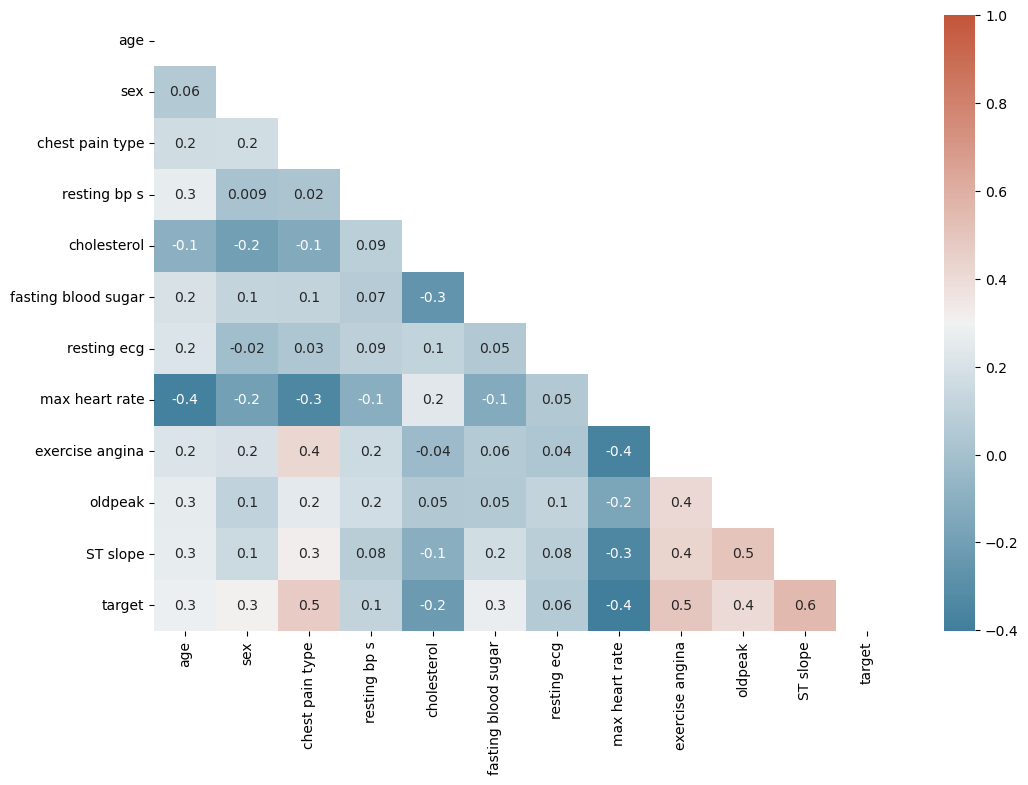

In [119]:
plt.figure(figsize=(12,8))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_cleared_2.corr(), dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data_cleared_2.corr(), mask=mask, cmap=cmap, annot=True, square=False, fmt=".1g", vmax=1)

По таблице видно, что сильно коррелируемых (свыше 0.7) атрибутов нет, это хорошо

Посмотрим также на ящики с усами (boxplots)

In [120]:
data_cleared_2.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

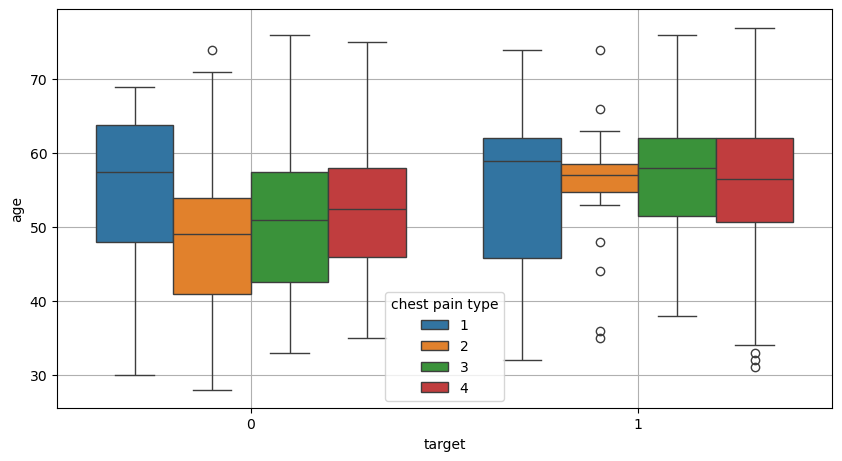

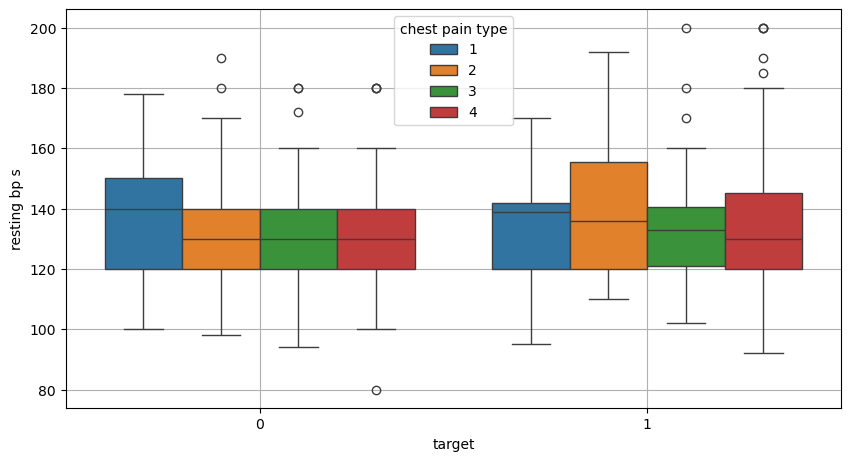

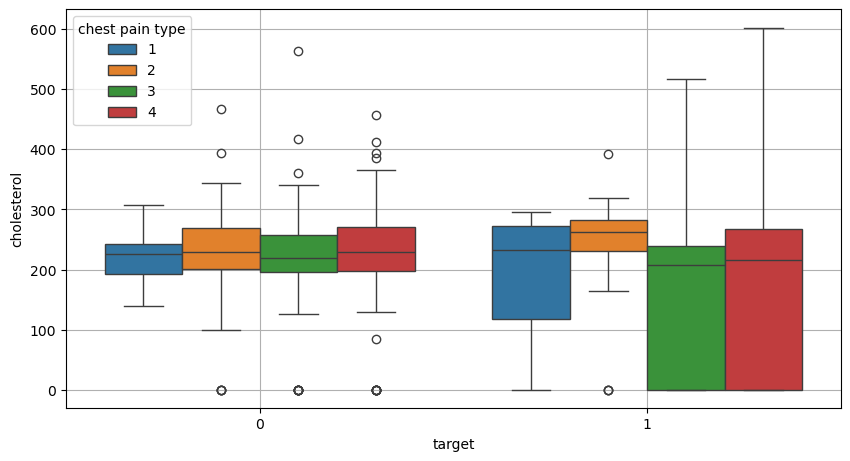

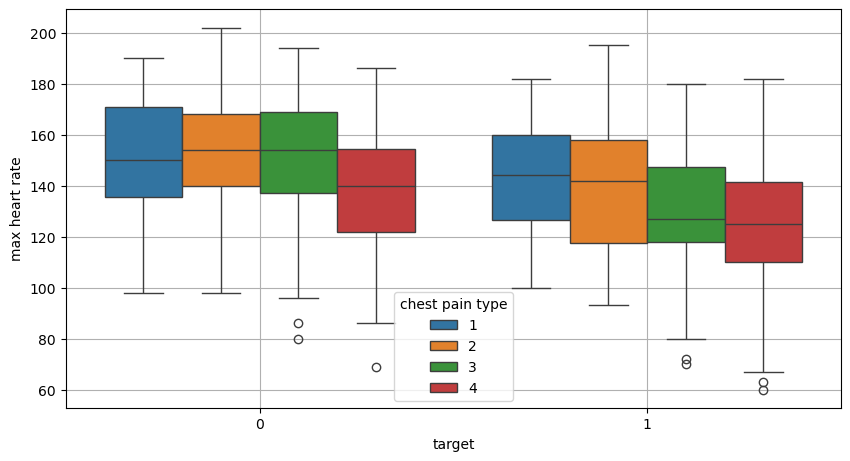

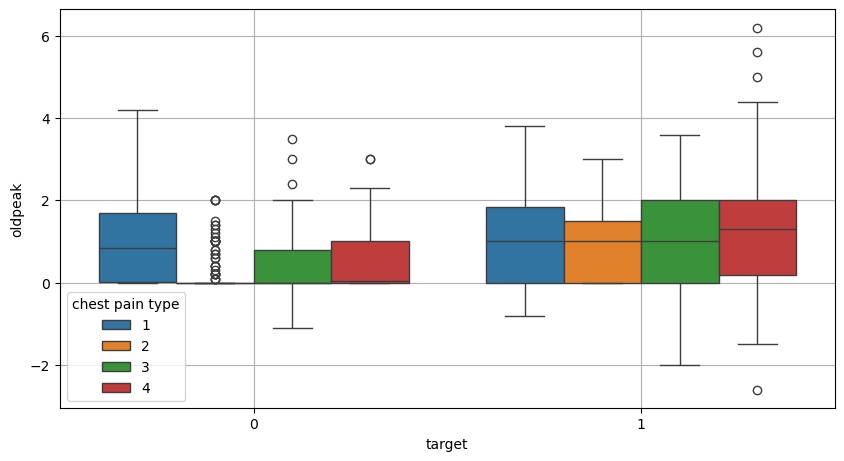

In [121]:
col = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
hue="chest pain type"

for i in range(1, len(col)+1):
    plt.figure(figsize=(10, 30))
    plt.subplot(len(col), 1, i)
    sns.boxplot(data=data_cleared_2, x="target", y=f'{col[i-1]}', hue=hue)
    plt.grid()

# for i in range(1, 4):
#     plt.subplot(2, 3, i)
#     sns.boxplot(data=data_cleared_2, x="target", y=f'{col[-i]}', hue=hue)
#     plt.grid()


Построив "ящики с усами", интересными становятся 3 и 5 графики. На 3 рисунке заметно, что нижняя граница ящика совпадает с нижним квартилем у людей страдающих сердечными болезнями (класс 1) и боль в груди (chain pain type) имеет характер 3,4. Ранее мы уже говорили о том, что около 10% строк (172) исходного объема набора данных имеют атрибут *cholesterol* равный 0.

Странная ситуация и с 5 графиком. Так для людей не страдающих сердечными болезнями и типом болью в груди равной 2 (atypical angina) атрибут oldpeak в основном находится на уровне 0. В основном это единичные наблюдения ("выбросы") с подобной болью в груди.

А что по сбалансированности классов

In [122]:
round(data_cleared_2.target.value_counts(normalize = True), 3)

target
1    0.553
0    0.447
Name: proportion, dtype: float64

Классы достаточно сбалансированы и не нуждаются в ребалансировке или генерации синтетических данных

# Построение модели классификации

Обозначим, что нам важно достичь такого результата, когда мы четко предсказываем наличие болезни, так как если человек реально имеет сердечную болезнь, а модель предсказывает ее отсутствие, то это плохой результат.

In [201]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, make_scorer, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [162]:
X = data_cleared_2.drop(columns='target')
y = data_cleared_2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, stratify=y)

Начнем классификацию с логрегрессии

### Logistic Regression

In [180]:
log_reg = LogisticRegression(random_state=23)
log_reg.fit(X_train, y_train)

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=23)

In [181]:
log_pred = log_reg.predict(X_test)

In [182]:
print(classification_report(y_test, log_pred, digits=3))

              precision    recall  f1-score   support

           0      0.800     0.854     0.826       103
           1      0.875     0.827     0.850       127

    accuracy                          0.839       230
   macro avg      0.838     0.841     0.838       230
weighted avg      0.841     0.839     0.839       230



Достаточно неплохой результат при базовых параметрах, но recall для 1 класса низкий, нам необходимо достичь "идеального" уровня, то есть 1.

Воспользуемся методом GridSearch, чтобы подобрать оптимальные параметры

In [174]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=23)

param_grid = [
    {
        'penalty': ['l2', 'none'],
        'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
        'C': [1, 2.5, 5, 10],
        'l1_ratio': [None]
    },
    {
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'C': [1, 2.5, 5, 10],
        'l1_ratio': [None, 0, 0.25, 0.5, 1]
    },
    {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['saga'],
        'C': [1, 2.5, 5, 10],
        'l1_ratio': [None, 0, 0.25, 0.5, 1]
    }
]

log_gscv = GridSearchCV(log_reg, param_grid=param_grid, scoring=make_scorer(recall_score), cv=5)

log_gscv.fit(X_train, y_train)

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=23),
             param_grid=[{'C': [1, 2.5, 5, 10], 'l1_ratio': [None],
                          'penalty': ['l2', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                     'sag']},
                         {'C': [1, 2.5, 5, 10],
                          'l1_ratio': [None, 0, 0.25, 0.5, 1],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [1, 2.5, 5, 10],
                          'l1_ratio': [None, 0, 0.25, 0.5, 1],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             scoring=make_scorer(recall_score))

In [175]:
print(round(log_gscv.best_score_, 3))
print(log_gscv.best_params_)

0.876
{'C': 2.5, 'l1_ratio': None, 'penalty': 'l1', 'solver': 'liblinear'}


In [176]:
log_gscv_pred = log_gscv.best_estimator_.predict(X_test)
print(classification_report(y_test, log_gscv_pred, digits=3))

              precision    recall  f1-score   support

           0      0.829     0.845     0.837       103
           1      0.872     0.858     0.865       127

    accuracy                          0.852       230
   macro avg      0.850     0.851     0.851       230
weighted avg      0.853     0.852     0.852       230



Результат намного лучше, сохраним полученные метрики для данной модели

In [239]:
log_reg_auc = round(roc_auc_score(y_test, log_gscv_pred), 3)
log_reg_acc = round(accuracy_score(y_test, log_gscv_pred), 3)
log_reg_prec = round(precision_score(y_test, log_gscv_pred), 3)
log_reg_rec = round(recall_score(y_test, log_gscv_pred), 3)
log_reg_f1 = round(f1_score(y_test, log_gscv_pred), 3)

Проделаем те же самые манипуляции уже с другими моделями, такими как: RandomForest, XGBoost, LightGBM, CatBoost.

### Random Forest

In [205]:
rf = RandomForestClassifier(random_state=23)

params = {'n_estimators': [100, 150, 200],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [5, 10, 15],
          'min_samples_split': [2, 5],
          'max_features': ['sqrt', 'log2', None]}

rf_gscv = GridSearchCV(rf, param_grid=params, scoring=make_scorer(recall_score), cv=5)

rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150, 200]},
             scoring=make_scorer(recall_score))

In [206]:
print(round(rf_gscv.best_score_, 3))
print(rf_gscv.best_params_)

0.924
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


In [207]:
rf_gscv_pred = rf_gscv.best_estimator_.predict(X_test)
print(classification_report(y_test, rf_gscv_pred, digits=3))

              precision    recall  f1-score   support

           0      0.848     0.816     0.832       103
           1      0.855     0.882     0.868       127

    accuracy                          0.852       230
   macro avg      0.852     0.849     0.850       230
weighted avg      0.852     0.852     0.852       230



In [240]:
rf_auc = round(roc_auc_score(y_test, rf_gscv_pred), 3)
rf_acc = round(accuracy_score(y_test, rf_gscv_pred), 3)
rf_prec = round(precision_score(y_test, rf_gscv_pred), 3)
rf_rec = round(recall_score(y_test, rf_gscv_pred), 3)
rf_f1 = round(f1_score(y_test, rf_gscv_pred), 3)

### XGBoost

In [221]:
xgb_class = xgb.XGBClassifier(enable_categorical=True, verbosity = 0, random_state = 23)

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.1],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 5],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2],
    'scale_pos_weight': [1, 5],
    'eval_metric': ['error', 'pre'],
    'objective': ['binary:logistic', 'binary:hinge']
}

xgb_gscv = GridSearchCV(xgb_class, param_grid=params, scoring=make_scorer(recall_score), cv=5)

xgb_gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=23, ...),
             param_grid={'eval_metric': ['error', 'pre'], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 7],
                         'min_child_weight': [1, 5], 'n_estimators': [100, 200],
                         'objective': ['binary:logistic', 'binary:hinge'],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [1, 2],
                         'scale_pos_weight': [1, 5]},
             scoring=make_scorer(recall_score))

In [222]:
print(round(xgb_gscv.best_score_, 3))
print(xgb_gscv.best_params_)

0.984
{'eval_metric': 'error', 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 5}


In [223]:
xgb_gscv_pred = xgb_gscv.best_estimator_.predict(X_test)
print(classification_report(y_test, xgb_gscv_pred, digits=3))

              precision    recall  f1-score   support

           0      0.981     0.505     0.667       103
           1      0.712     0.992     0.829       127

    accuracy                          0.774       230
   macro avg      0.846     0.748     0.748       230
weighted avg      0.832     0.774     0.756       230



In [241]:
xgb_auc = round(roc_auc_score(y_test, xgb_gscv_pred), 3)
xgb_acc = round(accuracy_score(y_test, xgb_gscv_pred), 3)
xgb_prec = round(precision_score(y_test, xgb_gscv_pred), 3)
xgb_rec = round(recall_score(y_test, xgb_gscv_pred), 3)
xgb_f1 = round(f1_score(y_test, xgb_gscv_pred), 3)

### LightGBM

In [225]:
lgbm_clf = LGBMClassifier(verbose = -1, random_state=23)
categorical_features = ['chest pain type', 'resting ecg', 'ST slope']

lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'min_child_weight': [1, 5],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2],
}

lgbm_gscv = GridSearchCV(lgbm_clf, param_grid=lgbm_params, scoring=make_scorer(recall_score), cv=5)

lgbm_gscv.fit(X_train, y_train, categorical_feature=categorical_features)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 304, number of negative: 245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 549, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553734 -> initscore=0.215769
[LightGBM] [Info] Start training from score 0.215769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=23),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 7],
                         'min_child_weight': [1, 5], 'n_estimators': [100, 200],
                         'num_leaves': [31, 50], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [1, 2]},
             scoring=make_scorer(recall_score))

In [226]:
print(round(lgbm_gscv.best_score_, 3))
print(lgbm_gscv.best_params_)

0.926
{'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 2}


In [227]:
lgbm_gscv_pred = lgbm_gscv.best_estimator_.predict(X_test)
print(classification_report(y_test, lgbm_gscv_pred, digits=3))

              precision    recall  f1-score   support

           0      0.892     0.718     0.796       103
           1      0.803     0.929     0.861       127

    accuracy                          0.835       230
   macro avg      0.847     0.824     0.829       230
weighted avg      0.843     0.835     0.832       230



In [242]:
lgbm_auc = round(roc_auc_score(y_test, lgbm_gscv_pred), 3)
lgbm_acc = round(accuracy_score(y_test, lgbm_gscv_pred), 3)
lgbm_prec = round(precision_score(y_test, lgbm_gscv_pred), 3)
lgbm_rec = round(recall_score(y_test, lgbm_gscv_pred), 3)
lgbm_f1 = round(f1_score(y_test, lgbm_gscv_pred), 3)

### CatBoost

In [230]:
catboost_clf = CatBoostClassifier(random_state=23, silent=True)

catboost_params = {
    'iterations': [100, 200],
    'depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5],
    'border_count': [32, 64],
    'bagging_temperature': [0.5, 1],
}

catboost_gscv = GridSearchCV(catboost_clf, param_grid=catboost_params, scoring=make_scorer(recall_score), cv=5)

catboost_gscv.fit(X_train, y_train, cat_features=categorical_features)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x34a0a7a90>,
             param_grid={'bagging_temperature': [0.5, 1],
                         'border_count': [32, 64], 'depth': [5, 10],
                         'iterations': [100, 200], 'l2_leaf_reg': [3, 5],
                         'learning_rate': [0.01, 0.1]},
             scoring=make_scorer(recall_score))

In [231]:
print(round(catboost_gscv.best_score_, 3))
print(catboost_gscv.best_params_)

0.924
{'bagging_temperature': 0.5, 'border_count': 32, 'depth': 5, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [232]:
catboost_gscv_pred = catboost_gscv.best_estimator_.predict(X_test)
print(classification_report(y_test, catboost_gscv_pred, digits=3))

              precision    recall  f1-score   support

           0      0.838     0.854     0.846       103
           1      0.880     0.866     0.873       127

    accuracy                          0.861       230
   macro avg      0.859     0.860     0.860       230
weighted avg      0.861     0.861     0.861       230



In [243]:
cat_auc = round(roc_auc_score(y_test, catboost_gscv_pred), 3)
cat_acc = round(accuracy_score(y_test, catboost_gscv_pred), 3)
cat_prec = round(precision_score(y_test, catboost_gscv_pred), 3)
cat_rec = round(recall_score(y_test, catboost_gscv_pred), 3)
cat_f1 = round(f1_score(y_test, catboost_gscv_pred), 3)

# Оценка моделей классификации

Создадим dataframe куда будем записывать модели и их метрики

In [245]:
models = [type(log_reg).__name__, type(rf).__name__, type(xgb_class).__name__, type(lgbm_clf).__name__, type(catboost_clf).__name__]
acc = [log_reg_acc, rf_acc, xgb_acc, lgbm_acc, cat_acc]
auc = [log_reg_auc, rf_auc, xgb_auc, lgbm_auc, cat_auc]
reccall = [log_reg_rec, rf_rec, xgb_rec, lgbm_rec, cat_rec]
precision = [log_reg_prec, rf_prec, xgb_prec, lgbm_prec, cat_prec]
f1 = [log_reg_f1, rf_f1, xgb_f1, lgbm_f1, cat_f1]

In [246]:
d = {'Models': models,
     'F1-score': f1,
     'Accuracy': acc,
     'ROC_AUC': auc,
     'Recall': reccall,
     'Precision': precision}
metrics = pd.DataFrame(data=d)

In [250]:
metrics.sort_values(by=['F1-score', 'Recall', 'Precision', 'ROC_AUC', 'Accuracy'])

Models  F1-score  Accuracy  ROC_AUC  Recall  Precision
2           XGBClassifier     0.829     0.774    0.748   0.992      0.712
3          LGBMClassifier     0.861     0.835    0.824   0.929      0.803
0      LogisticRegression     0.865     0.852    0.851   0.858      0.872
1  RandomForestClassifier     0.868     0.852    0.849   0.882      0.855
4      CatBoostClassifier     0.873     0.861    0.860   0.866      0.880

К сожалению, нам не удалось достичь идеального уровня классификации метрики recall, которая является для нас целевой. Возможно надо глубже работать с данными, а также собрать больше наблюдений. Нельзя также отрицать, что стоило больше параметров рассматривать через GridSearch, однако тогда обучение было очень долгим и ресурсозатратным. Ранее я уже говорил о том, что в данной задаче нужна дополнительная работа специалист в области сердченых заболеваний.

Среди рассмотренных моделей по метрике Recall лучше оказался XGBClassifier, после LGBMClassifier, третье место занял RandomForestClassifier.
Если же сравнивать модели по F1-score, тогда три лучшие модели следующие: CatBoostClassifier, RandomForestClassifier и LogisticRegression.